##**KL ダイバージェンス (KL Divergence)**  

### **KL ダイバージェンスが示すこと: 理想と現実のギャップ**

**必要な前提知識**  
この投稿の内容を理解するには、以下の内容について知っておくことをお勧めします。

- **情報エントロピー**
- **クロスエントロピー (Cross Entropy)**

本投稿のテーマである **KL ダイバージェンス (KL-divergence) **を説明する前に、その理解に必須の概念であるクロスエントロピーについて先に学びます。

クロスエントロピーとは、一言で言えば「予測とのズレによって生じる驚きの大きさ（つまり情報量）」です。

### **バイナリケースのクロスエントロピー**
バイナリケースでは、出力が 0 または 1 の二つの結果のみがあり得ます。

あるデータに対して、目標値とモデルの出力値を考えることができます。例えば、あるデータ（身長、体重など）を与えられて、「男性」または「女性」と判定する場合、それぞれの判定結果を 0 または 1 で出力することができます。

バイナリケースのクロスエントロピー（BCE）は以下のように定義されます。

ターゲットが $ y $ で予測値が $ \hat{y} $ のとき、

$$
BCE = -y\log(\hat{y}) - (1 - y)\log(1 - \hat{y}) \quad \tag{1}
$$

（BCE: Binary Cross Entropy）

ターゲット値とモデルの出力値は共に 0 または 1 となるため、合計で 4 つのケースが考えられます。

1. **$ y = 1 $, $ \hat{y} = 1 $ の場合**  
   この場合、ターゲット値をモデルが正確に当てたので、BCE 値は 0 になります。

   $$
   BCE = -1 \cdot \log(1) - 0 \cdot \log(0) = 0 \quad \tag{2}
   $$

2. **$ y = 1 $, $ \hat{y} = 0 $ の場合**  
   この場合、ターゲット値を当てられなかったので、BCE の値は無限大です。

   $$
   BCE = -1 \cdot \log(0) - 0 \cdot \log(1) = \infty \quad \tag{3}
   $$

3. **$ y = 0 $, $ \hat{y} = 1 $ の場合**  
   上記のケースと同様にターゲット値を当てられず、BCE の値も無限大です。

   $$
   BCE = -0 \cdot \log(1) - 1 \cdot \log(0) = \infty \quad \tag{4}
   $$

4. **$ y = 0 $, $ \hat{y} = 0 $ の場合**  
   ターゲット値を正確に当てた場合で、BCE 値は 0 になります。

   $$
   BCE = -0 \cdot \log(0) - 1 \cdot \log(1) = 0 \quad \tag{5}
   $$

### **複数の出力ケースを持つ場合のクロスエントロピー**
バイナリクロスエントロピーについて見たとき、クロスエントロピーがターゲット値とモデルの出力値がどれほど異なるかを表現していることがわかります。つまり、BCE の式は次のようにも書けます。

$$
BCE = \sum_{x \in \{0, 1\}} (-P(x) \log(Q(x))) \quad \tag{6}
$$

ここで $ P(x) $ は望ましいターゲットの結果値であり、$ Q(x) $ はモデルからの出力値と見なせます。

これをさらに一般化すると、複数の出力ケースを持つ場合の**クロスエントロピー**は次のように定義できます。

$$
CE = \sum_{x \in \chi} (-P(x) \log(Q(x))) \quad \tag{7}
$$

このクロスエントロピーの式からわかるのは、CE は $ Q $ というモデルの結果に対して、$ P $ という理想的な値を期待したときに得られる「驚きの大きさ」を情報量として表現しているということです。

例えば、以下のように少し異常なサイコロを振るとします。





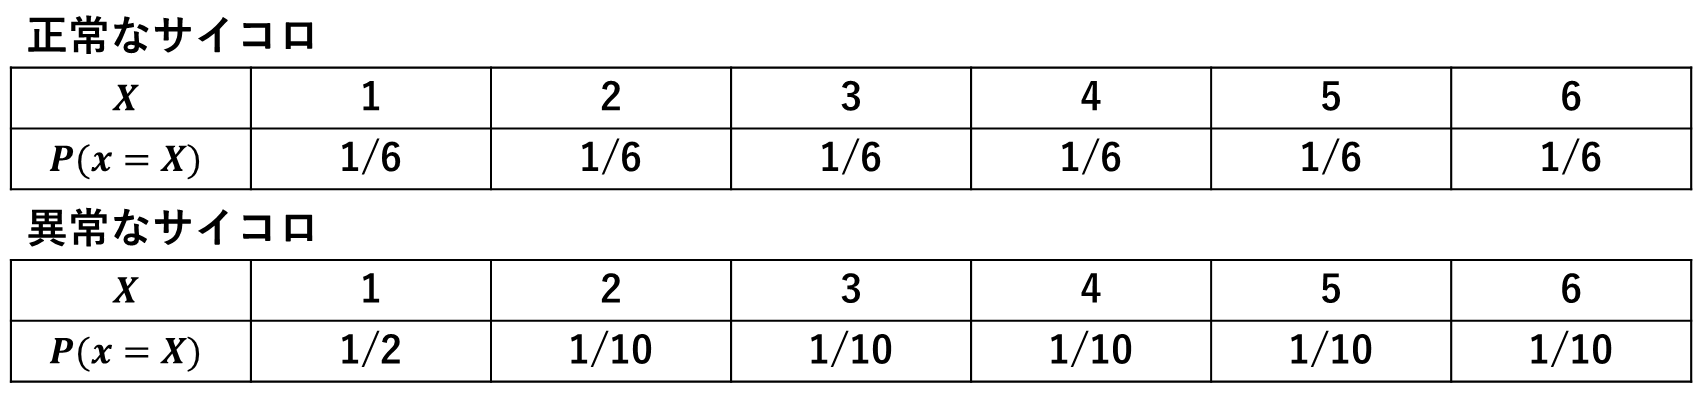

**図1. 理想的（または正常な）サイコロと、異常に 1 が多く出るサイコロの確率分布**

つまり、この例が示すのは、すべての目の確率が 1/6 である正常なサイコロとは異なり、私たちが持っているこの変なサイコロ（モデル）を振ったときに得られる「驚きの度合い」がどれだけ大きいかを調べようということです。

クロスエントロピーを計算すると、

$$
⇒ -\sum_{i} P(x_i) \log(Q(x_i)) = -( \frac{1}{6}\log_2(\frac{1}{2}) + \frac{5}{6}\log_2(\frac{1}{10})) = 2.9349 \text{ bit} \quad \tag{8}
$$

これに対し、正常なサイコロであれば情報エントロピーの値は

$$
⇒ -\sum_{i} P(x_i) \log(P(x_i)) = -( \frac{6}{6}\log_2(\frac{1}{6})) = 2.5850 \text{ bit} \quad \tag{9}
$$

となります。

つまり、理想的なサイコロを期待して、実際のサイコロの値を使ってクロスエントロピーを計算すると、その驚きの程度（つまり理想と現実のギャップに対する驚き）はより大きいといえます。

### **KL ダイバージェンス: 情報エントロピーの相対的な比較**
KL ダイバージェンスは**カルバック・ライブラー (Kullback-Leibler)ダイバージェンス**の略称であり、カルバックとライブラーは人の名前です。

KL ダイバージェンスを考える際には、「ダイバージェンス」という言葉にだけ注目すればよいのですが、このダイバージェンスの意味はベクトル場の発散のような概念ではなく、「違い」を意味しているだけです。

特に、ここで「違い」とは２つの確率分布を比較するという意味です。このとき、情報エントロピーを利用して比較が行われるため、KL ダイバージェンスは「**相対エントロピー (relative entropy)**」とも呼ばれます。

例えば、目的が確率分布 $ P $ を正確にモデル化することだとします。

離散確率分布 $ P $ と $ Q $ が同じサンプル空間 $ \chi $ 上で定義されるとすると、KL ダイバージェンスは次のように定義されます。

$$
D_{KL}(P \parallel Q) = \sum_{x \in \chi} P(x) \log_b\left(\frac{P(x)}{Q(x)}\right) \quad \tag{10}
$$

ここで、ログの底 $ b $ は通常 2, 10, または $ e $ のいずれかが使われ、それぞれの情報量の単位はビット (bit), ディット (dit), ニット (nit) です。

式をもう少し展開すると、

$$
⇒ -\sum_{x \in \chi} P(x) \log_b\left(\frac{Q(x)}{P(x)}\right) \quad \tag{11}
$$

$$
= -\sum_{x \in \chi} P(x) \log_b Q(x) + \sum_{x \in \chi} P(x) \log_b P(x) \quad \tag{12}
$$

式 (3) をよく見ると、2つの総和を含む項はすべて期待値に置き換えて考えることができることがわかります。

$$
⇒ -E_P[\log_b Q(x)] + E_P[\log_b P(x)] \quad
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import ipywidgets as widgets
from ipywidgets import interact
from scipy.special import kl_div

# KLダイバージェンスを計算する関数
def compute_kl_divergence(p, q):
    # KLダイバージェンスの計算
    kl_divergence = np.sum(kl_div(p, q))
    return kl_divergence

# 分布とKLダイバージェンスのプロット関数
def plot_kl_divergence(mu_q):
    # X軸の範囲
    x = np.linspace(-10, 10, 1000)

    # 分布P(x)とQ(x)
    p_x = norm.pdf(x, loc=0, scale=1)  # P(x)は標準正規分布
    q_x = norm.pdf(x, loc=mu_q, scale=1)  # Q(x)の平均を変更

    # KLダイバージェンスの計算
    kl_value = compute_kl_divergence(p_x, q_x)

    # 図の作成
    plt.figure(figsize=(12, 5))

    # 左の図: P(x) と Q(x)
    plt.subplot(1, 2, 1)
    plt.fill_between(x, p_x, color='blue', alpha=0.6, label='P(x)')
    plt.fill_between(x, q_x, color='red', alpha=0.6, label='Q(x)')
    plt.title('Probability Distributions P(x) and Q(x)', fontsize=14)
    plt.legend()
    plt.grid(True)

    # 右の図: KLダイバージェンス
    plt.subplot(1, 2, 2)
    kl_integrand = p_x * np.log(p_x / q_x)  # KLダイバージェンスの積分
    plt.fill_between(x, kl_integrand, color='green', alpha=0.6)
    plt.title(f'KL Divergence D_KL(P||Q) = {kl_value:.2f}', fontsize=14)
    plt.grid(True)

    plt.show()

# スライダーの設定 (Q(x)の平均を調整)
mu_slider = widgets.FloatSlider(value=0, min=-5, max=5, step=0.1, description='Mean of Q(x)')

# インタラクティブなプロットの表示
interact(plot_kl_divergence, mu_q=mu_slider)


interactive(children=(FloatSlider(value=0.0, description='Mean of Q(x)', max=5.0, min=-5.0), Output()), _dom_c…

<function __main__.plot_kl_divergence(mu_q)>